In [51]:
import urllib3
import pandas as pd
import logging
from pprint import pprint
import io

url = 'https://datahub.ckan.io/dataset/610fb217-0499-40e7-b53f-a50c9b02b98f/resource/772b62d8-0847-4104-ad97-ceac7fb0438d/download/beijing-aqm.txt'
logging.captureWarnings(True)
http = urllib3.PoolManager()

response = http.request('GET', url)
data = response.data.decode('utf-8')
    
df = pd.read_csv(io.StringIO(data), sep='\t')
df.head()

reading          date    aqi
0        1  3/1/10 22:00  172.0
1        2  3/1/10 23:00  173.0
2        3   3/2/10 0:00  174.0
3        4   3/2/10 1:00  174.0
4        5   3/2/10 2:00  178.0

In [31]:
df.date = pd.to_datetime(df.date,infer_datetime_format=True)

reading      int64
date        object
aqi        float64
dtype: object

In [53]:
df = df.dropna()

In [54]:
df.set_index('reading')

date    aqi
reading                      
1         3/1/10 22:00  172.0
2         3/1/10 23:00  173.0
3          3/2/10 0:00  174.0
4          3/2/10 1:00  174.0
5          3/2/10 2:00  178.0
...                ...    ...
54790    5/31/16 19:00   49.0
54791    5/31/16 20:00   50.0
54792    5/31/16 21:00   47.0
54793    5/31/16 22:00   30.0
54794    5/31/16 23:00   28.0

[52429 rows x 2 columns]

In [89]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour

In [142]:
df_hour_noir = df[df.hour == 23]
df_hour_jour = df[df.hour == 6]

In [143]:
df_hour.head()

reading         date    aqi  year  month  day  hour
2         3  3/2/10 0:00  174.0  2010      3    2     0
26       27  3/3/10 0:00  179.0  2010      3    3     0
50       51  3/4/10 0:00  173.0  2010      3    4     0
74       75  3/5/10 0:00  298.0  2010      3    5     0
98       99  3/6/10 0:00   66.0  2010      3    6     0

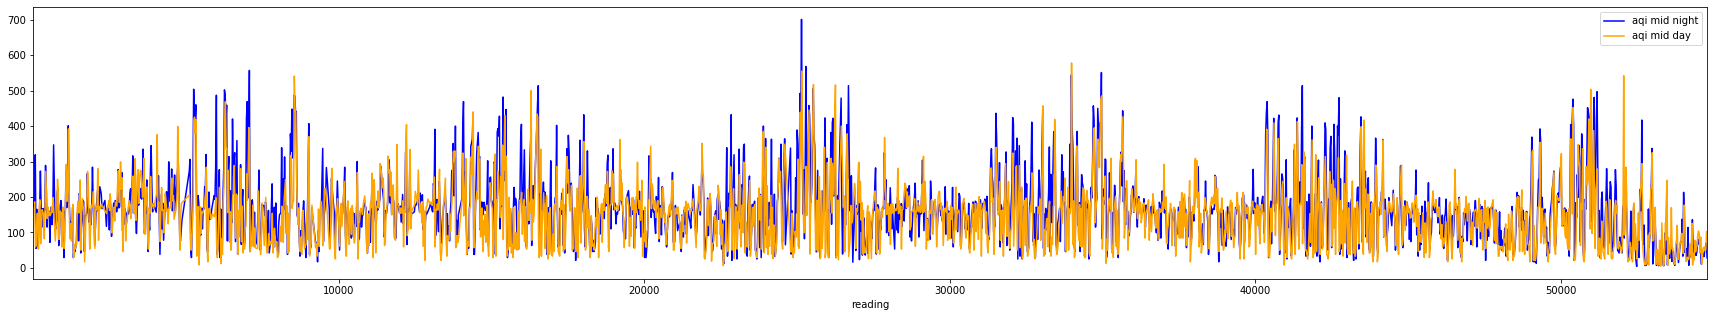

In [144]:
import matplotlib.pyplot as plt

ax = df_hour_noir.plot(x='reading', y='aqi',color='blue', label='aqi mid night')
df_hour_jour.plot(x='reading', y='aqi',color='orange', label = 'aqi mid day', ax=ax)
plt.rcParams["figure.figsize"] = [30, 5]
plt.show()

In [137]:
df_fit = df[(df.year==2016) & (df.month==5) & (df.day==31)]

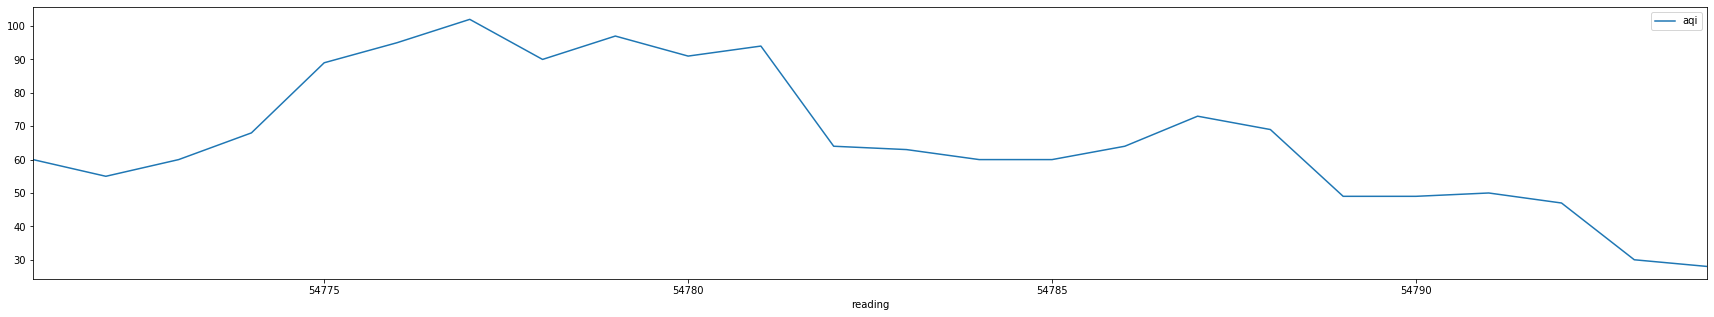

In [138]:
df_fit = df_fit
df_fit.plot(x='reading', y='aqi')
plt.show()


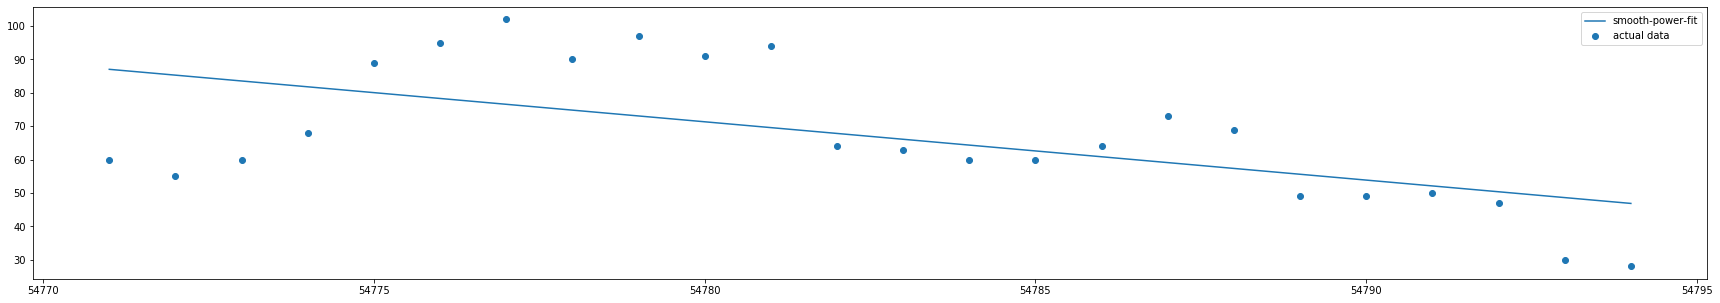

In [141]:
# make the line smooth instead of jagged
import numpy as np
from scipy.optimize import curve_fit

# x = [5.5, 6.0, 6.5, 7, 9]
# y = [100, 80, 40, 10, 5]
x = df_fit.reading
y = df_fit.aqi
popt, pcov = curve_fit(lambda fx,a,b: a*fx**2 + b*fx,  x,  y)
x_linspace = np.linspace(min(x), max(x), 100)
power_y = popt[0]*x_linspace**2 + popt[1]*x_linspace

plt.scatter(x, y, label='actual data')
plt.plot(x_linspace, power_y, label='smooth-power-fit')
plt.legend()
plt.show()